<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo42/blob/main/Actividad_Semanal_4_A01113135_A01793944.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semana 4 (PCA)
# Daniel Velasco Zarate A01793944
# Marco Antonio López Millán A01113135
# Ciencia y analítica de datos (Gpo 10)
# 11/10/2022**


In [3]:
import pandas as pd #Importando panda
import numpy as np  #Importando Numpy

In [4]:
df =pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv") #creando un DF

In [5]:
df #mostrando el contenido de DF

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [6]:
nueva_df=df.copy() #Realizamos una copia de DF
nueva_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [7]:
nueva_df.rename(columns = {"X1":"Monto Credito","X2":"Gen","X3":"Edu","X4":"E.Civil","X5":"Edad","X6":"H.sep","X7":"H.ago","X8":"H.jul","X9":"H.jun","X10":"H.may","X11":"H.abr","X12":"AB.sep","X13":"AB.ago","X14":"AB.jul","X15":"AB.jun","X16":"AB.may","X17":"AB.abr","X18":"AP.sep","X19":"AP.ago","X20":"AB.jul","X21":"AB.jun","X22":"AB.may","X23":"AB.abr","Y":"Resp"}, inplace = True)
#En este código nos encontramos reemplazando la variables por el un nombre facil de indentificar

In [8]:
nueva_df.isnull().sum().sort_values(ascending=True) #Nos permite identificar los valores nulos para cada variable y ordenarlos de menor a mayor

ID                0
Monto Credito     0
Gen               1
Edu               2
E.Civil           2
H.sep             3
Resp              3
H.ago             5
AB.abr            5
Edad              5
H.jul             7
AB.jul            8
AP.sep            8
H.jun             9
AP.ago            9
AB.abr           10
AB.may           11
AB.jun           11
AB.sep           11
AB.ago           11
AB.jul           13
H.abr            14
AB.jun           15
H.may            16
AB.may           17
dtype: int64

In [9]:
totalnulos = nueva_df.isnull().sum().sum() #Nos permite calcular el total de valores nulos
totalnulos 

196

In [10]:
totalfilas = len(nueva_df.index)
totalfilas

30000

In [11]:
print ("La proporción de datos nulos contra filas existentes es:", totalnulos/totalfilas*100, "%")

La proporción de datos nulos contra filas existentes es: 0.6533333333333333 %


In [14]:
nueva_df.dropna(axis = 0, inplace = True) #Eliminamos aquellas filas que cuentan con valores nulos
nueva_df

,ID,Monto Credito,Gen,Edu,E.Civil,Edad,H.sep,H.ago,H.jul,H.jun,...,AB.jun,AB.may,AB.abr,AP.sep,AP.ago,AB.jul,AB.jun,AB.may,AB.abr,Resp
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [15]:
nueva_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             29958 non-null  int64  
 1   Monto Credito  29958 non-null  int64  
 2   Gen            29958 non-null  float64
 3   Edu            29958 non-null  float64
 4   E.Civil        29958 non-null  float64
 5   Edad           29958 non-null  float64
 6   H.sep          29958 non-null  float64
 7   H.ago          29958 non-null  float64
 8   H.jul          29958 non-null  float64
 9   H.jun          29958 non-null  float64
 10  H.may          29958 non-null  float64
 11  H.abr          29958 non-null  float64
 12  AB.sep         29958 non-null  float64
 13  AB.ago         29958 non-null  float64
 14  AB.jul         29958 non-null  float64
 15  AB.jun         29958 non-null  float64
 16  AB.may         29958 non-null  float64
 17  AB.abr         29958 non-null  float64
 18  AP.sep

In [16]:
nueva_df.corr()



,ID,Monto Credito,Gen,Edu,E.Civil,Edad,H.sep,H.ago,H.jul,H.jun,...,AB.jun,AB.may,AB.abr,AP.sep,AP.ago,AB.jul,AB.jun,AB.may,AB.abr,Resp
ID,1.000000,0.026230,0.019466,0.038794,-0.028700,0.019104,-0.030036,-0.010967,-0.018695,-0.003163,...,0.040379,0.016807,0.016773,0.009673,0.008374,0.039068,0.007752,0.000616,0.002889,-0.013991
Monto Credito,0.026230,1.000000,0.024212,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,...,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
Gen,0.019466,0.024212,1.000000,0.014701,-0.031478,-0.091259,-0.057637,-0.070690,-0.065648,-0.059586,...,-0.021854,-0.017056,-0.016733,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
Edu,0.038794,-0.219120,0.014701,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.108640,...,-0.000566,-0.007625,-0.009192,-0.037385,-0.030007,-0.039953,-0.038263,-0.040276,-0.037189,0.028109
E.Civil,-0.028700,-0.107801,-0.031478,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,0.032826,...,-0.023292,-0.025371,-0.021206,-0.005705,-0.008016,-0.003399,-0.012516,-0.001052,-0.006571,-0.024544
Edad,0.019104,0.144515,-0.091259,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,...,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
H.sep,-0.030036,-0.271201,-0.057637,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.539384,...,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616,0.324769
H.ago,-0.010967,-0.296206,-0.070690,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.662429,...,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491,0.263761
H.jul,-0.018695,-0.286245,-0.065648,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.777245,...,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816,0.235765
H.jun,-0.003163,-0.267371,-0.059586,0.108640,0.032826,-0.049865,0.539384,0.662429,0.777245,1.000000,...,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537,0.217037


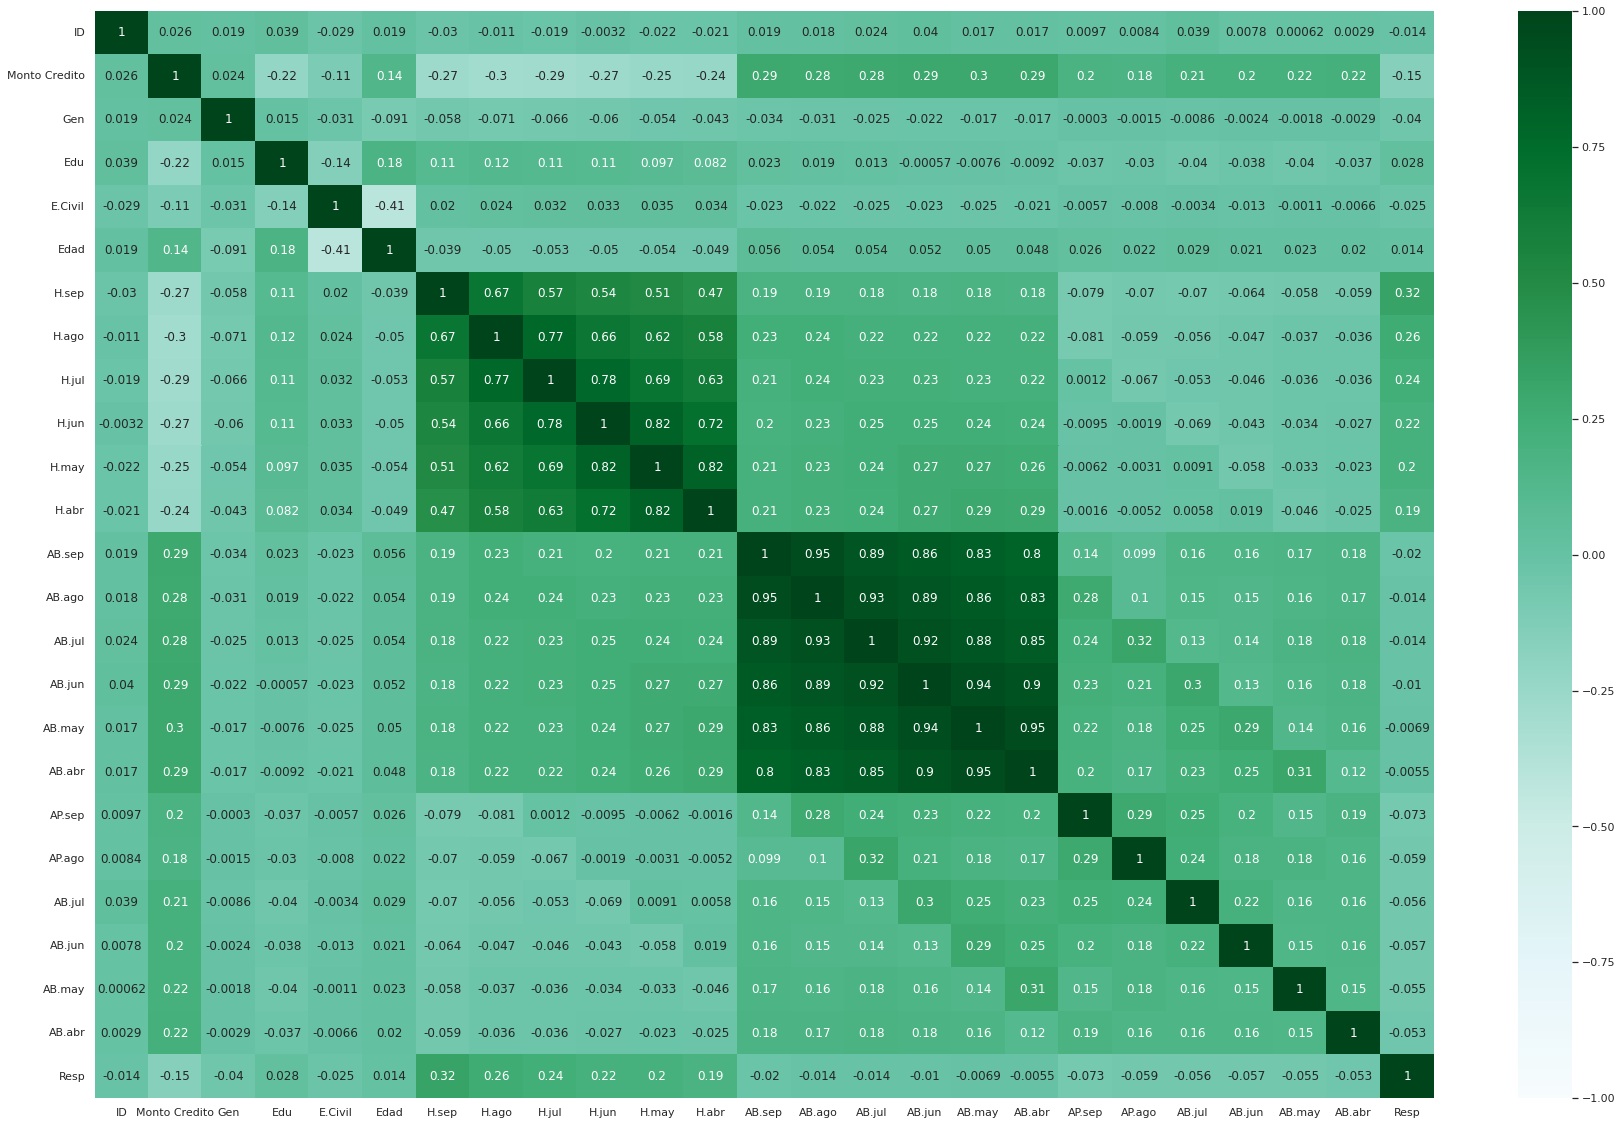

In [17]:
import seaborn as sns
cor = nueva_df.corr()
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = "BuGn", annot= True) #realizamos mapa de calor con la variables de correlación

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   #utilizamos standard scaler para scalazar los datos
scaled = scaler.fit_transform(nueva_df)
scaled[:5]

array([[-1.7337476 , -1.13736269,  0.8096885 ,  0.18584882, -1.05708615,
        -1.24628151,  1.79464177,  1.78258329, -0.69667977, -0.66663037,
        -1.53070038, -1.48651337, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473,  1.87668918],
       [-1.73363205, -0.36656147,  0.8096885 ,  0.18584882,  0.85883054,
        -1.0292244 , -0.874468  ,  1.78258329,  0.13943643,  0.18924143,
         0.23563523,  1.99391629, -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373,  1.87668918],
       [-1.73351651, -0.59780183,  0.8096885 ,  0.18584882,  0.85883054,
        -0.16099598,  0.01523526,  0.11194994,  0.13943643,  0.18924143,
         0.23563523,  0.25370146, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0

In [19]:
dfscaled = pd.DataFrame(scaled, columns=nueva_df.columns) #creamos un df con los datos escalados

In [20]:
dfscaled.head() #mostrarmos las primeras filas del nuevo df


,ID,Monto Credito,Gen,Edu,E.Civil,Edad,H.sep,H.ago,H.jul,H.jun,...,AB.jun,AB.may,AB.abr,AP.sep,AP.ago,AB.jul,AB.jun,AB.may,AB.abr,Resp
0,-1.733748,-1.137363,0.809689,0.185849,-1.057086,-1.246282,1.794642,1.782583,-0.696680,-0.666630,...,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,1.876689
1,-1.733632,-0.366561,0.809689,0.185849,0.858831,-1.029224,-0.874468,1.782583,0.139436,0.189241,...,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,1.876689
2,-1.733517,-0.597802,0.809689,0.185849,0.858831,-0.160996,0.015235,0.111950,0.139436,0.189241,...,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.532853
3,-1.733401,-0.906122,0.809689,0.185849,-1.057086,0.164590,0.015235,0.111950,0.139436,0.189241,...,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,-0.532853
4,-1.733285,-0.906122,-1.235043,0.185849,-1.057086,2.335161,-0.874468,0.111950,-0.696680,0.189241,...,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,-0.532853


In [22]:
from sklearn.decomposition import PCA
pcs = PCA()      #aplicamos PCA a nuestro df

pcs_t = pcs.fit_transform(dfscaled)
pcs_t[:5]

array([[-1.81152719e+00, -1.31109312e+00, -4.79856504e-01,
        -4.96891653e-01, -9.29036583e-01, -1.72752378e+00,
        -8.72848984e-01,  2.81895407e+00,  5.47550839e-01,
        -4.13674173e-01, -2.79043407e-01,  3.53063028e-02,
        -6.11341186e-02,  2.28443597e+00, -9.06892949e-01,
        -3.65093730e-01, -8.98572759e-02,  3.92132963e-01,
        -2.69173727e-01, -9.01295152e-01,  6.17348353e-01,
        -7.33835429e-02,  8.03717878e-03, -5.05734584e-04,
         1.48337724e-02],
       [-6.81177569e-01, -2.44731800e+00,  1.14337338e+00,
        -4.16158879e-01, -5.13314427e-01, -1.62769381e+00,
        -1.86278672e-01,  9.05246390e-01,  5.13277118e-01,
        -1.23088524e-02, -2.14079946e-01,  3.08582488e-01,
         1.78891451e-01, -1.40408745e+00, -1.26953595e-01,
        -3.42237422e-01,  6.95992804e-01,  2.10484035e+00,
         2.00596223e-02, -2.73441900e-01,  8.55840108e-01,
        -1.51615695e-01, -4.23194042e-03, -1.36099060e-02,
         1.09450551e-02],
    

In [23]:
pcsSummary_df = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_df    #realizmaos tabla para observar la varianza explicada y acumulada de nuestro PCA

,% varianza explicada,% varianza acumulada
0,26.21,26.209795
1,16.81,43.021291
2,6.22,49.240922
3,5.90,55.145289
4,4.25,59.391505
5,3.94,63.330989
6,3.88,67.212352
7,3.66,70.871029
8,3.63,74.496981
9,3.54,78.041467


In [24]:
pcs_labels = [f'PC{i + 1}' for i in range(len(dfscaled.columns))] #agregamos etiquetas para PCA
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,26.21,26.209795
PC2,16.81,43.021291
PC3,6.22,49.240922
PC4,5.90,55.145289
PC5,4.25,59.391505
PC6,3.94,63.330989
PC7,3.88,67.212352
PC8,3.66,70.871029
PC9,3.63,74.496981
PC10,3.54,78.041467


Si tomamos como referencia nuestra tabla de componentes principales podemos darnos cuenta que a mayor número de componentes que seleccionemos será mayor la varianza que logremos mantener.

Por ejemplo si decidimos tomar los primeros 11 componentes lograremos mantener el 81.51 %.

La ventaja de este metodo de reducción es que incluso hasta con 3 componentes podríamos mantener cerca del 50% de la varianza.

Sin embargo, dependerá de la precisión deseada del estudio que busquemos realizar con esta información el tomar una cantidad especifica de componentes-

Si analizamos la tabla también podemos darnos cuenta que estos 25 componente mantienen el 100% de la varianza de nuestros datos iniciales.

In [25]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", dfscaled.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  25.000834529492273
Varianza total de los componentes:  25.00083452949228


In [29]:
comps_df = pd.DataFrame(
pcs.components_.round(4), # pcs.components nos da los pesos de cada componente contra las variables originales
columns = pcs_df.columns, 
index = dfscaled.columns) 
comps_df.iloc[:,:12]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
ID,0.0061,0.0657,-0.0220,0.0199,-0.0056,0.0140,0.1646,0.1973,0.2033,0.2100,0.2137,0.2088
Monto Credito,0.0229,0.3116,0.0306,-0.0881,-0.0396,0.0629,-0.2968,-0.3279,-0.3349,-0.3343,-0.3212,-0.2958
Gen,-0.0598,0.0097,0.0270,-0.3243,0.4746,-0.4841,-0.0205,0.0172,0.0617,0.0885,0.1092,0.1115
Edu,0.0520,0.0756,-0.0761,0.2224,-0.4179,0.4348,0.0193,0.0488,0.0815,0.1063,0.1124,0.1071
E.Civil,0.4997,-0.1851,0.6137,0.4048,0.0192,-0.1601,-0.1032,-0.0401,-0.0027,0.0364,0.0443,0.0504
Edad,0.7181,-0.0551,-0.6408,0.0057,0.1748,0.0070,-0.0096,0.0044,-0.0130,-0.0190,-0.0312,-0.0389
H.sep,-0.4309,-0.2634,-0.3858,0.4219,0.1652,0.0105,-0.1468,-0.0712,-0.0093,0.0198,0.0386,0.0334
H.ago,-0.1086,-0.2744,0.0136,0.4556,0.1975,-0.1407,0.2155,0.0469,-0.0839,-0.1922,-0.2356,-0.2392
H.jul,-0.0981,0.0096,0.0885,-0.2584,-0.1032,0.0363,-0.0041,-0.0789,-0.0548,-0.0338,0.0188,0.0562
H.jun,-0.0463,-0.0338,-0.0411,0.0584,0.0090,0.0082,-0.0341,0.0022,-0.0105,-0.0177,0.0115,0.0922


En la tabla anterior podemos observar el peso que tiene cada una de las variables para nuestros componentes.

Cada de ellos tiene un valor númerico que representa la relevancia o peso que aporta a cada componente.

Para poder entender estos números podemos tomar como refencia el valor absoluto, mientras más grande sea ese número también será mayor su peso en el componente.

Por su parte el signo nos indica si la relación con el componente es negativa o positiva.

En el caso de componente PC1 podemos observar que la edad el que tiene un mayor peso con 0.71 mientras que AP.sep es la menor con 0.0004.

En el caso de componente PC2 podemos observar que la edad el que tiene un mayor peso con -0.75 mientras que AP.abr es la menor con 0.0007.

De esta manera podríamos continuar analizando el peso de cada variable en cada componente, por ello a continuación podemos observar un listado con el análisis:


In [34]:
comps_df.iloc[:,:14].abs().idxmax() #nos ayuda a identificar la variable con mayor peso de cada componente


PC1       Edad
PC2     AB.jun
PC3       Edad
PC4      H.ago
PC5     AB.jul
PC6     AB.jul
PC7     AB.may
PC8     AB.abr
PC9     AP.ago
PC10    AB.abr
PC11    AB.jul
PC12    AB.abr
PC13    AP.sep
PC14      Resp
dtype: object

In [35]:
comps_df.iloc[:,:14].abs().idxmin()#nos ayuda a identificar la variable con menor peso de cada componente

PC1      AP.sep
PC2      AB.abr
PC3      AB.abr
PC4      AB.may
PC5      AB.may
PC6      AB.jun
PC7      AP.sep
PC8        Resp
PC9     E.Civil
PC10     AB.may
PC11       Resp
PC12     AB.abr
PC13     AB.jul
PC14     AB.jul
dtype: object

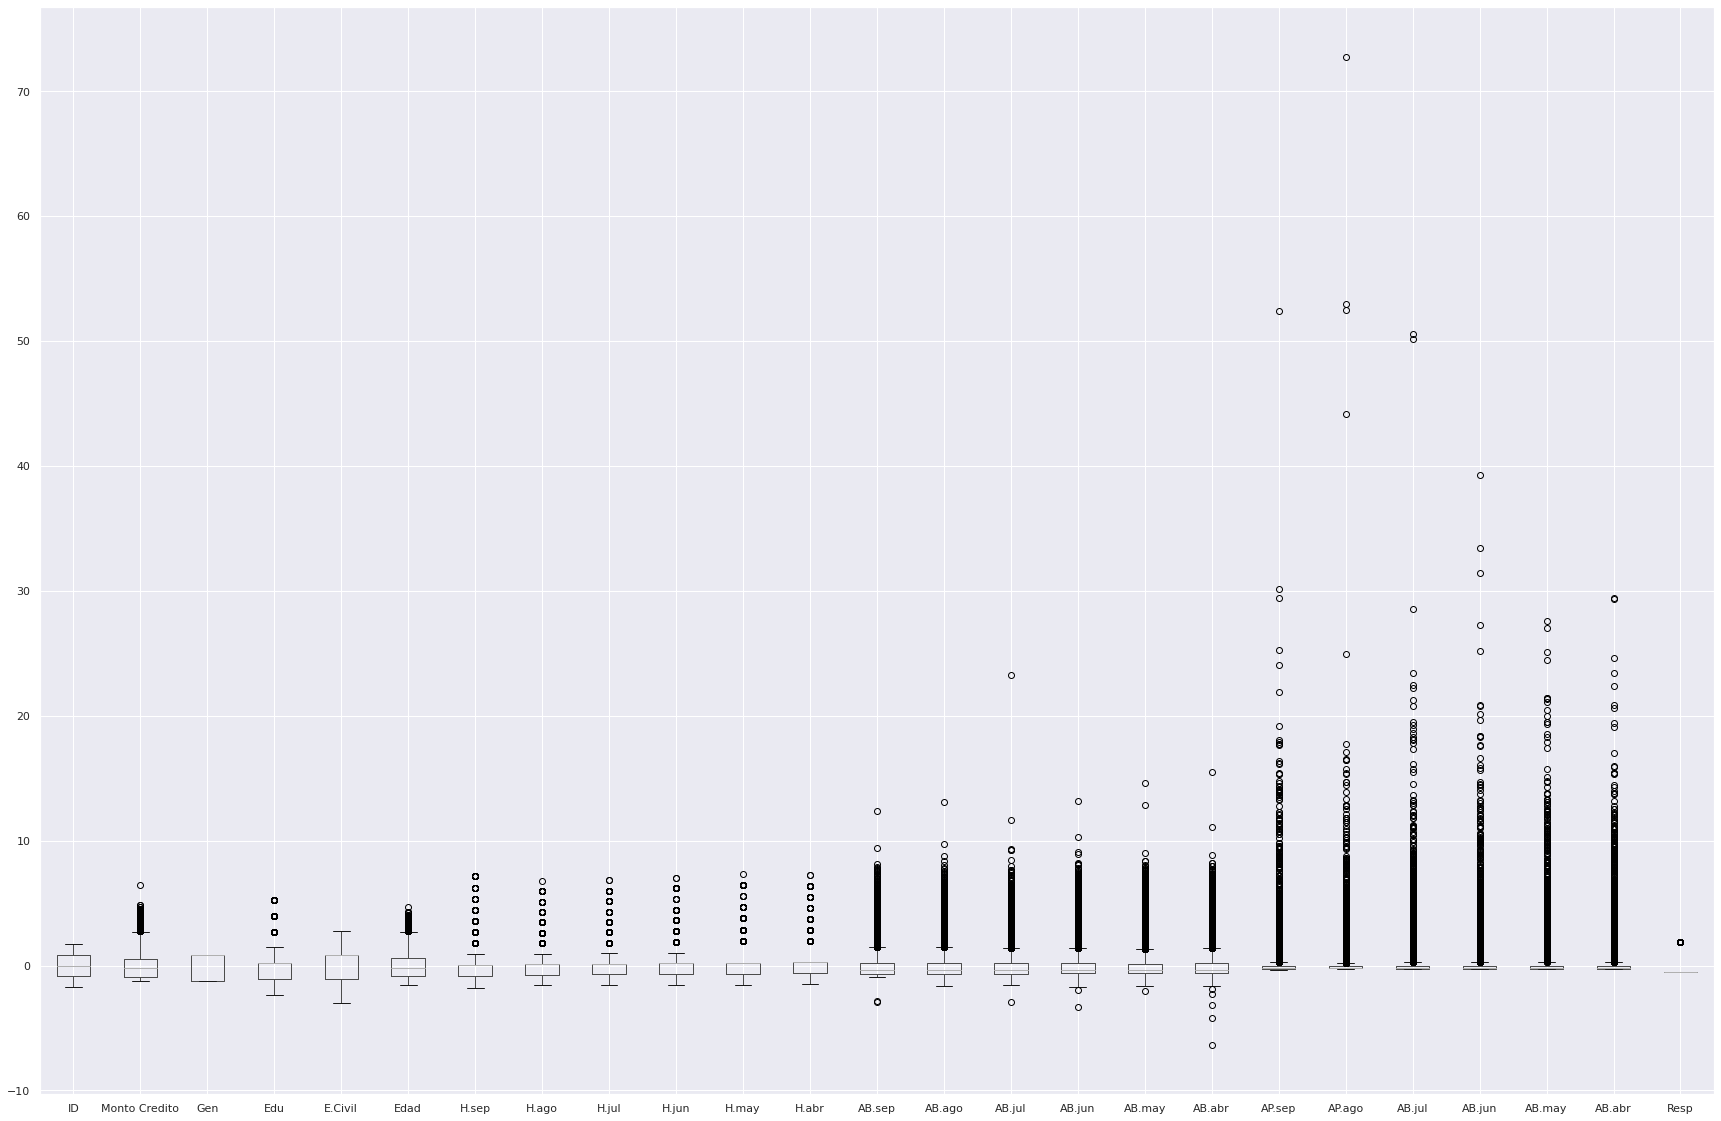

In [32]:
dfscaled.boxplot()

En este gráfico podemos fuera de los bigotes de nuestro gráfico un cantidad considerable de datos atipicos. Si analizamos la formula utilizada para calcular la varianza podemos entender que el contar con datos atipicos afecta nuestra varianza y a su vez este tienen un impacto en el resultado de nuestro PCA. Por ello toma bastante relevancia el tomar acción ante estos datos.


# **Cuál es el número de componentes mínimo y por qué? **

El número de componentes mínimos a utilizar depende del porcentaje de la varianza que estemos dispuestos a sacrificar. 
 
Por ejemplo, si consideramos que mantener el 80% cumple con nuestras expectativas podríamos utilizar 11 componentes ya que la varianza acumulada estaría llegando al 81.5%. 
 
En otro escenario en el que busquemos mantener el 90% de la varianza tendríamos que optar por 14 componentes para lograr llegar al 90.1%.
 
Ambas opciones no permitirían realizar una buena reducción y mantener la mayor varianza posible.


# **¿Cuál es la variación de los datos que representan esos componentes? **

Cada uno de los componentes aporta una variación distinta y se encuentran orden descendente que al seleccionar las primeras logremos mantener el mayor porcentaje de varianza.

PC1 = 21.26%
PC2=16.81	%
PC3=6.22%
PC4=5.90%	
PC6=3.94%	
PC7=3.88%	
PC8=3.66%	
PC9=3.63%	
PC10=3.54%	
PC11=3.48	%
PC12=3.12	%
PC13=2.93	%
PC14=2.51	%

# **¿Cuál es la pérdida de información después de realizar PCA?  **

Si seleccionamos trabajar con 11 componentes estaríamos perdiendo el 18.5% de la varianza mientras que si nos inclinamos por 14 componente solo perderiamos el 9.9%.


# ** De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales? **

Las variables originales que tienen mayor importancia para nuestros 14 componentes principales que representan el 90.1% de la varianza son:

PC1       Edad
PC2     AB.jun
PC3       Edad
PC4      H.ago
PC5     AB.jul
PC6     AB.jul
PC7     AB.may
PC8     AB.abr
PC9     AP.ago
PC10    AB.abr
PC11    AB.jul
PC12    AB.abr
PC13    AP.sep
PC14      Resp

Las variables originales que tienen menor importancia:

PC1      AP.sep
PC2      AB.abr
PC3      AB.abr
PC4      AB.may
PC5      AB.may
PC6      AB.jun
PC7      AP.sep
PC8        Resp
PC9     E.Civil
PC10     AB.may
PC11       Resp
PC12     AB.abr
PC13     AB.jul
PC14     AB.jul
